In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from technical_analysis import technical_analysis as ta

In [31]:
df = pd.read_excel('شستا.xlsx', index_col='Date', parse_dates=['Date'])

In [32]:
df = df[['Adj Open', 'Adj High', 'Adj Low', 'Adj Close']]

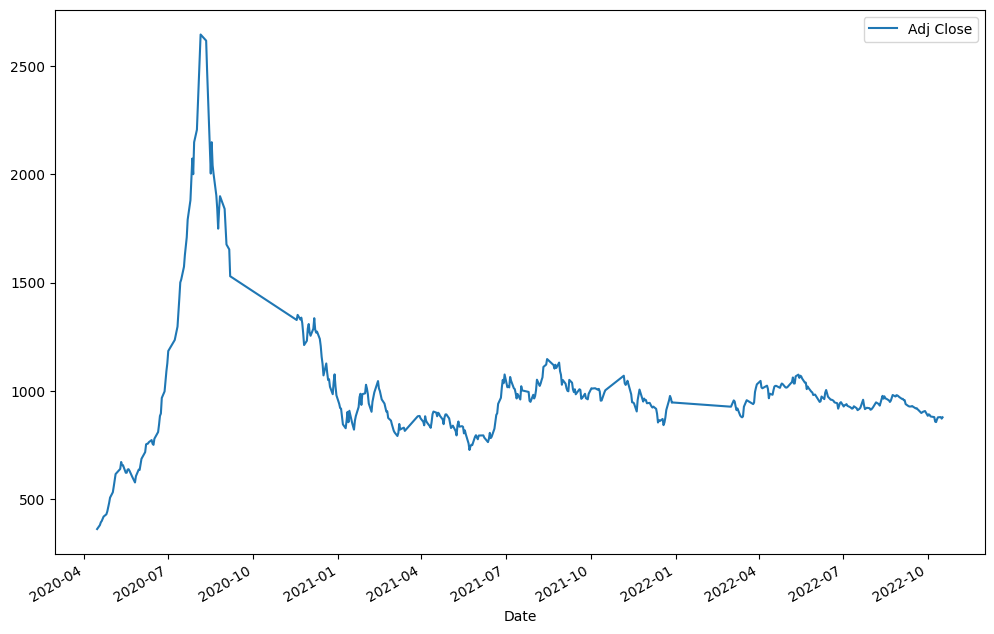

In [33]:
df['Adj Close'].plot(figsize=(12, 8))
plt.legend()

In [34]:
shasta_analysis = ta(df=df, col_name='Adj Close')

In [36]:
shasta_analysis.sharp_ratio(mode='daily')

0.07512918491366788

In [37]:
shasta_analysis.sortino_ratio(mode='daily')

0.11688389424769872

In [40]:
ma = shasta_analysis.moving_average(mode='EMA', period1=10, period2=30)

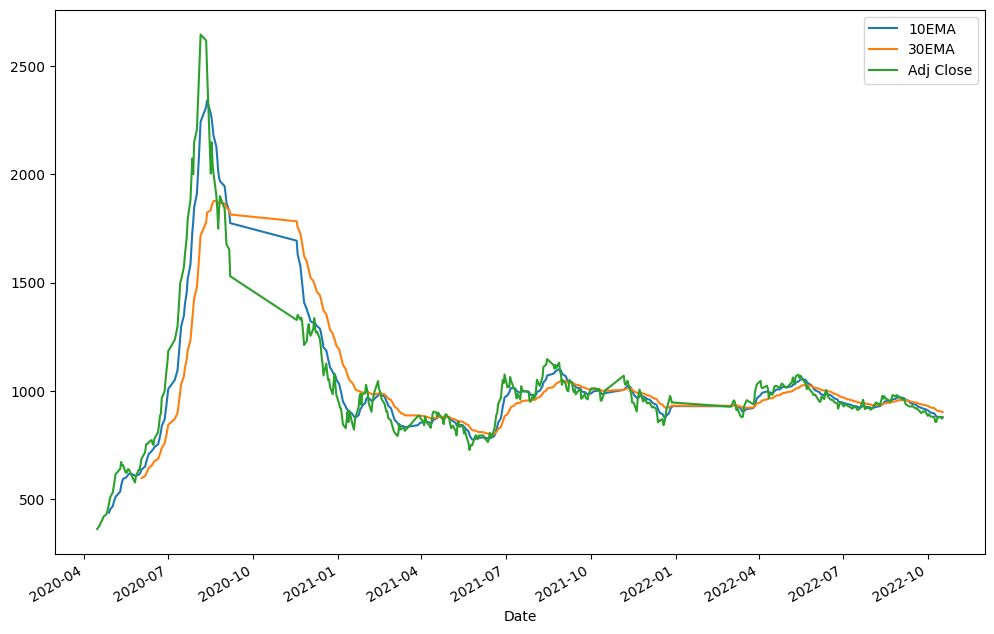

In [41]:
ax = ma.plot()
df['Adj Close'].plot(ax=ax, figsize=(12, 8))
plt.legend()

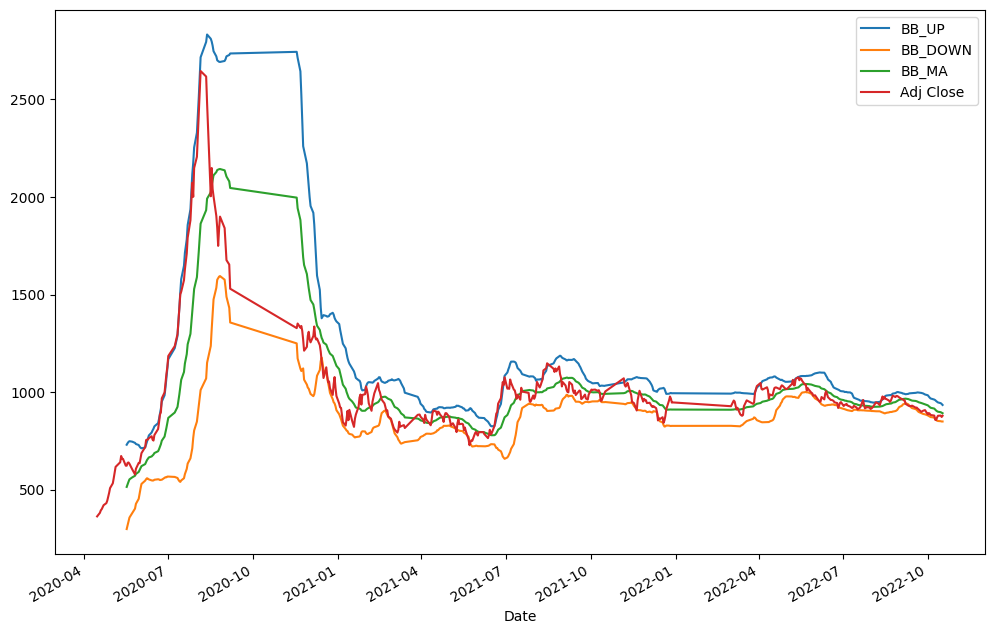

In [42]:
bb = shasta_analysis.bolinger_band(period=20, std_p=2)
ax = bb.plot()
df['Adj Close'].plot(ax=ax, figsize=(12, 8))
plt.legend()

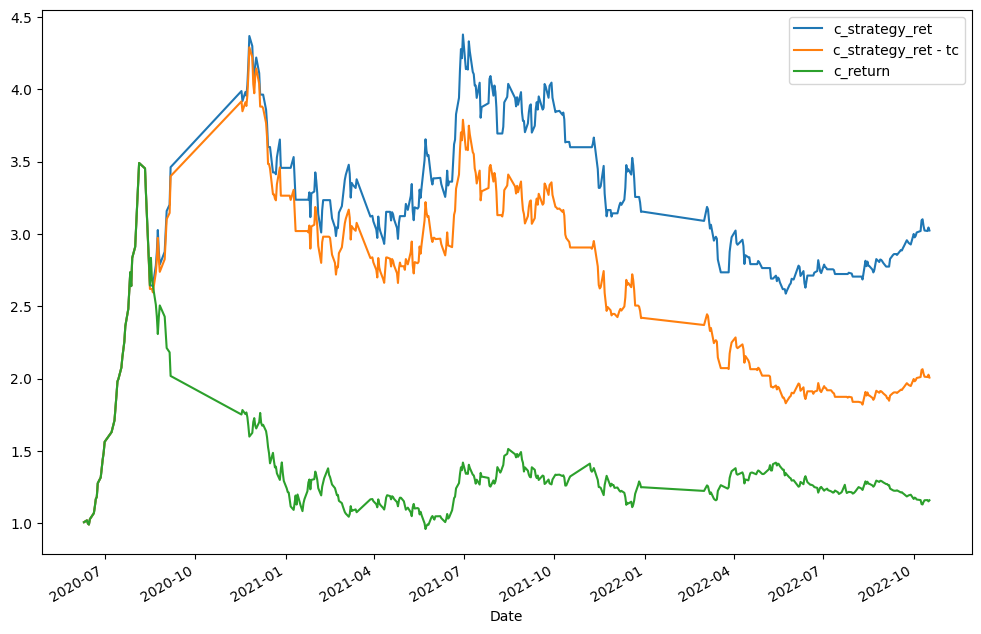

In [45]:
result = shasta_analysis.back_test(short_sell=True, tc_buy=0.003, tc_sell=0.009, strategy={'macd':(12,26,9), 'moving_average':('SMA', 6, 14)})

<AxesSubplot: xlabel='Date'>

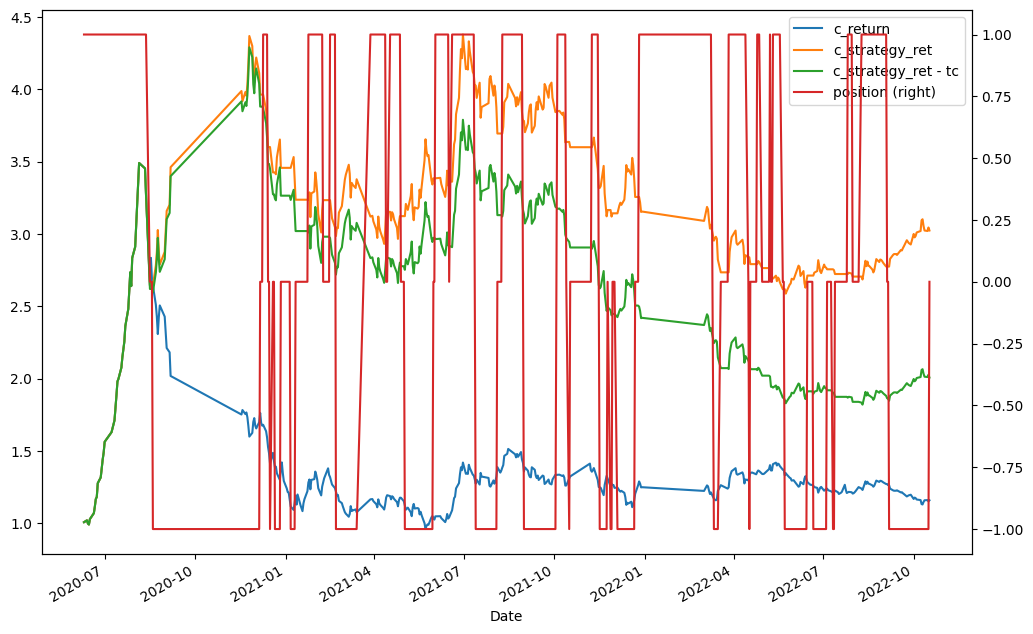

In [46]:
result[['c_return', 'c_strategy_ret', 'c_strategy_ret - tc', 'position']].plot(figsize=(12, 8), secondary_y='position')


In [47]:
result

,price,return,position,6SMA,14SMA,MA_position,macd,macd_signal,macd_position,strategy_ret,tc,trade,strategy_ret - tc,c_strategy_ret - tc,c_strategy_ret,c_return
Date,,,,,,,,,,,,,,,,
2020-06-10,764.33,0.008936,1.0,739.823333,674.108571,1.0,46.242989,37.764485,1,0.008936,0,0.0,1.008977,1.008977,1.008977,1.008977
2020-06-13,773.99,0.012559,1.0,754.241667,683.694286,1.0,48.082949,40.022106,1,0.012559,0,0.0,1.012639,1.021729,1.021729,1.021729
2020-06-14,757.11,-0.022050,1.0,760.676667,692.560000,1.0,47.694373,41.669787,1,-0.022050,0,0.0,0.978191,0.999446,0.999446,0.999446
2020-06-15,752.05,-0.006706,1.0,760.283333,703.090000,1.0,46.458337,42.683210,1,-0.006706,0,0.0,0.993317,0.992766,0.992766,0.992766
2020-06-16,780.32,0.036901,1.0,764.221667,717.502143,1.0,47.109420,43.609177,1,0.036901,0,0.0,1.037591,1.030085,1.030085,1.030085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,870.00,0.015055,-1.0,873.166667,891.357143,-1.0,-20.960725,-17.210498,-1,-0.015055,0,0.0,0.985057,2.035235,3.056118,1.148469
2022-10-12,879.00,0.010292,-1.0,871.333333,888.357143,-1.0,-19.937331,-17.755864,-1,-0.010292,0,0.0,0.989761,2.014396,3.024826,1.160350
2022-10-15,880.00,0.001137,-1.0,870.833333,885.785714,-1.0,-18.828549,-17.970401,-1,-0.001137,0,0.0,0.998864,2.012107,3.021389,1.161670
